# 1 hash (h1) for Main Title (i.e., dont use) 
## 2 hashes (h2) for Topic (e.g., Data Preparation)
### 3 hashes (h3) for sub-topic (e.g., under Data Preparation, should have a 3 hash called maybe "Importing Data"
#### 4 hashes (h4) for findings, analysis etc
No hash for explanations/comments

#### To standardize formating. 
#### Add more if anything to take note! DELETE AT THE END.


Anything to note WRITE HERE:


#### ROUGH PLAN
0) Library Setup

1) Data Description/Explanation or something (in place of Sample Collection). *Practical Motivation

2) Data Preparation. *Problem Formulation (im thinking we do this in 1.)

2.1 Data Cleaning

2.2 Feature Engineering... etc

3) Exploratory Data Analysis

4) Might Do Data Cleaning etc again depending on what we find in EDA

5) Modelling

6) Optimization (choose best performing model, use Grid search, etc.)

7) Findings/Conclusions?

8) References


## <u><center>ANYTHING BELOW THIS IS THE ACTUAL NOTEBOOK!</center></u>
-------------------------------------------------------------------------------------------------------------------------------------------------------

#### SC1015 FCSA Group 1: 
- Gay Ming Kai       (C230114@e.ntu.edu.sg)
- Jacob Ong Jia Chun (JONG163@e.ntu.edu.sg)
- Lim Zu Liang       (E230184@e.ntu.edu.sg)

<h1><center><u>Adult Census Income</u></center></h1>

// this will be the Table of contents. Do last.

## Chapter 0. Library Setup

In [11]:
def separate():
    print('*' * 40)

print("Data Analysis and Wrangling Packages")
import pandas as pd # Library for data processing and analysis.
import numpy as np # Library for numerical computing (provides support for multi-dimensional arrays and matrices).
import scipy as sp # Library for scientific computing and advanced mathematics.
print("- pandas version: {}". format(pd.__version__))
print("- NumPy version: {}". format(np.__version__))
print("- SciPy version: {}". format(sp.__version__)) 
separate()
print("Visualization Packages")
import matplotlib # Plotting library
import seaborn as sns  # Statistical data visualization based on matplotlib
print("- matplotlib version: {}".format(matplotlib.__version__))
print("- seaborn version: {}".format(sns.__version__))
separate()

print("Modelling Packages")
import sklearn as sk # Collection of machine learning algorithms.
print("- scikit-learn version: {}". format(sk.__version__))
separate()

Data Analysis and Wrangling Packages
- pandas version: 2.1.4
- NumPy version: 1.24.3
- SciPy version: 1.11.4
****************************************
Visualization Packages
- matplotlib version: 3.8.0
- seaborn version: 0.12.2
****************************************
Modelling Packages
- scikit-learn version: 1.3.0
****************************************


## Chapter 1. Dataset Overview

DRAFT: (NEED TO EDIT)

The dataset (https://archive.ics.uci.edu/ml/datasets/Adult) belongs to and is managed by the University of California Irvine. It was donated by Ronny Kohavi and Barry Becker in 1994.

The dataset has 1 target, 14 features and 32561 instances, and its been noted that there are missing values so we will have to identify and rectify it.

The 14 features are: // Need to describe these features and what they represent
- age
- workclass
- fnlwgt
- education
- education-num
- marital-status
- occupation 
- relationship
- race
- sex
- capital-gain
- capital-loss
- hours-per-week
- native-country 

The label/target is "income", binary classification. >50K, <=50K.

#### Data Preparation Note:
There are missing data in 3 features: `workclass`, `occupation`, and `native-country`.

#### Feature Engineering Note:
The feature "fnlwgt" is an abbreviation for "Final Weight" (datatype: cardinal number). This feature refers to an estimated number of people each row represents. For example, a specific row may have fnlwgt=2500, age=50, race=White, sex=female ...etc. This would mean 2500 people fall into the category of being 50 years old, White, female etc. Logically speaking, since this feature basically represents the count of a specific group of people represented, it should not affect the label. I will be conducting some analysis to see if my judgement is correct or not. If it indeed does not affect the label, then I will drop it.

The feature "education.num" is the mapped version of the "education" feature. For example, education=HS-grad -> education.num=9. Since they both represent the same thing, I will be removing one of them. Machine works better with numbers over strings/text, thus I will be removing the feature "education" in Feature Engineering.

## Chapter 2. Data Preparation

### 2.1 Import Dataset as Dataframe

In [14]:
# Aquiring data.
adult_data = pd.read_csv('data/adult.data', delimiter=",", header=None) # Reading a .data file (that does not have headers) into DataFrame.

# Since the dataset file does NOT provide the headers, we have to add them in ourselves.
column_names = ["age", "workclass", "fnlwgt", "education", "education-num", "marital-status", 
                "occupation", "relationship", "race", "sex", "capital-gain", "capital-loss", 
                "hours-per-week", "native-country", "income"]

# Assign column names to DataFrame.
adult_data.columns = column_names

# First look.
adult_data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


### 2.2 Identify and Remove Missing Values

In [25]:
adult_data.info() # Look for NULL values in the three variables that contain missing data.

<class 'pandas.core.frame.DataFrame'>
Index: 30162 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             30162 non-null  int64 
 1   workclass       30162 non-null  object
 2   fnlwgt          30162 non-null  int64 
 3   education       30162 non-null  object
 4   education-num   30162 non-null  int64 
 5   marital-status  30162 non-null  object
 6   occupation      30162 non-null  object
 7   relationship    30162 non-null  object
 8   race            30162 non-null  object
 9   sex             30162 non-null  object
 10  capital-gain    30162 non-null  int64 
 11  capital-loss    30162 non-null  int64 
 12  hours-per-week  30162 non-null  int64 
 13  native-country  30162 non-null  object
 14  income          30162 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


#### Findings:
- Appears to not have any null/missing values, but Dataset Overview mentioned that missing values exists.
- Missing values may be replaced with a representative value (e.g., "MISSING").

#### Perform:
- Option A: Peek at the data specifically to look for missing values.
- Option B: Find all the possible values of the three features (categorical) that are said to have missing data.

In [13]:
# We chose Option B as it is more robust (merely peeking head and tail may not show us the missing data).
print(adult_data["workclass"].value_counts())
separate()
print(adult_data["occupation"].value_counts())
separate()
print(adult_data["native-country"].value_counts())
separate()

workclass
 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: count, dtype: int64
****************************************
occupation
 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3770
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 ?                    1843
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: count, dtype: int64
****************************************
native-country
 United-States                 29170
 Mexico                          643
 ?                               583
 Philippines                     198
 Germany                         1

#### Findings:
- It seems that missing values are denoted as '?'.

#### Perform
- Identify all missing values, then determine what to do.

In [1]:
# Check all presence and count of '?' in the dataset.
print("Number of '?' in:\n")
print("Column", 11*' ', "Count")
print("-"*25)
def check_missing():
    for i in adult_data.columns: 
        t = adult_data[i].value_counts() 
        index = list(t.index)
        print(i, end="")
        x = 20 - len(i) # For styling purposes
        for j in index:
            temp = 0
            if j == " ?":
    
                print (x * ' ', t[' ?']) # Once a '?' is found, print the number of '?' in the feature.
                temp = 1
                break
        if temp == 0:
            print (x * ' ', "0") # '?' is absent from all rows of a specific feature.
check_missing()

Number of '?' in:

Column             Count
-------------------------


NameError: name 'adult_data' is not defined

#### Findings:
- Just like what the dataset said, only `workclass`, `occupation`, and `native-country` contains missing data.
    - They are all categorical features.
    - Cannot replace missing variables with central tendencies (mean, median). 

#### Perform:
- Option A: Remove rows containing missing data.
    - There are a maximum of 4262 missing data points (assuming no overlaps), which comprises about 13% of the total dataset.

- Option B: Remove the columns that contain missing data (`workclass`, `occupation`, and `native-country`).
    - These three features are intuitively crucial and likely to significantly impact the label income.
      
- Option C: Predict missing classification data based on other
  variables in the dataset using classification models like logistic regression.
    - Viable but can be inaccurate and time-consuming.
      
- Option D: Impute missing data using the respective features' mode.
    - It might skew the data and impact the model performance. 

- Conclusion: Option A
    - Given that we have 14 features, even after removing the missing values, we would still have approximately 28000 data points,
      which should be more than sufficient for analysis and prediction.

// FORMAT WEIRD, NEED TO FIX.

In [24]:
#Option A
adult_data = adult_data.drop(adult_data[
                             (adult_data["workclass"] == " ?") | 
                             (adult_data["occupation"] == " ?") | 
                             (adult_data["native-country"] == " ?")].index)

# Check if successfully removed.
check_missing()

age                  0
workclass            0
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation           0
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country       0
income               0


### 2.3 Peeks and Checks

In [17]:
adult_data.head(5) # Peek at first 5 rows.

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [ ]:
adult_data.tail() # Peek at last 5 rows.

#### Findings:
- Features `workclass`, `education`, `marital-status`, `occupation`, `relationship`, `race`, `native-country` are categorical.
- Feature `sex` and target `income` are dichotomous/binary.
- Features `age`, `fnlwgt`, `capital-gain`, `capital-loss`, `hours-per-week` are numerical.
- Feature `education-num` is enumerated from catergorical variable `education`

#### Perform
- Encode all categorical columns to numerical values so the machine learning algorithm works better.
- Feature `sex` and target `income` can be converted to binary number.

#### Perform
- Remove the rows that contain `' ?'` in the rows

## Chapter 3. Problem Formulation

### Utilize census (survey) data to forecast whether the earnings of a particular demographic surpass $50k annually.

In [9]:
# Problem statement: Predict whether the income of a specific group of people exceeds $50K/yr or not based on census (survey) data. 
# This problem is a binary classification problem.

In [10]:
# BIN columns?

## Chapter 4. Exploratory Analysis

### 4.1. Exploring the Response

C:\Users\gaymi\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


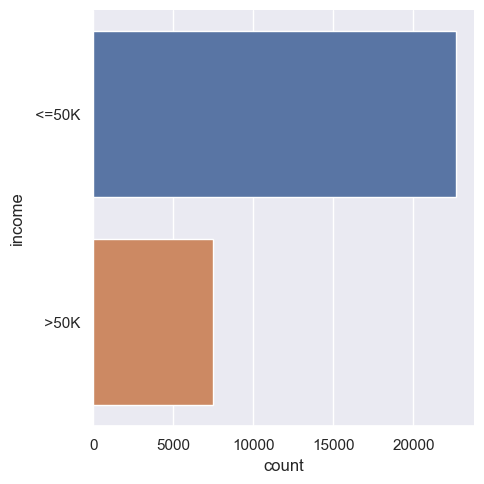

In [11]:
sns.catplot(y = 'income', data = adult_data, kind = "count")

In [29]:
print("Number of data in each Count catergory:\n")
print("Income", 11*' ', "Counter")
print("-"*25)
adult_data_gb = adult_data.groupby('income')
i = "Income >= 50000"
print(i, end="")
x = 20 - len(i) # For styling purposes
print (x * ' ', adult_data_gb['income'].count()[0])
i = "Income < 50000"
print(i, end="")
x = 20 - len(i) # For styling purposes
print (x * ' ', adult_data_gb['income'].count()[1])

Number of data in each Count catergory:

Income             Counter
-------------------------
Income >= 50000      22654
Income < 50000       7508


#### Findings
- Data is more concentrated towards income >= 50000

### 4.2. Exploring the Numerical Predictors

### 4.3. Exploring the Catergorical Predictors